In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
results = pd.read_csv('results.csv')
results.reset_index(drop=True, inplace=True)
locations = pd.read_csv('device_locations.csv')
locations.reset_index(drop=True, inplace=True)


In [60]:
# Merge two dataframes
data = results.merge(locations, on='id', how='inner')

In [61]:
data

,id,accuracy,f1_score,x,y
0,0,0.4740,0.6431,35.195620,4.461948
1,10,0.5476,0.7077,10.429007,21.891949
2,11,0.5187,0.6831,21.528327,51.390401
3,12,0.3947,0.5660,46.445361,35.463217
4,13,0.4190,0.5906,85.391845,16.109047
5,14,0.3143,0.4783,5.613973,59.188132
6,15,0.5811,0.7351,44.247890,85.693814
7,16,0.4219,0.5934,31.367967,46.314849
8,17,0.5531,0.7123,41.183793,82.459364
9,18,0.4646,0.6344,96.156183,53.093632


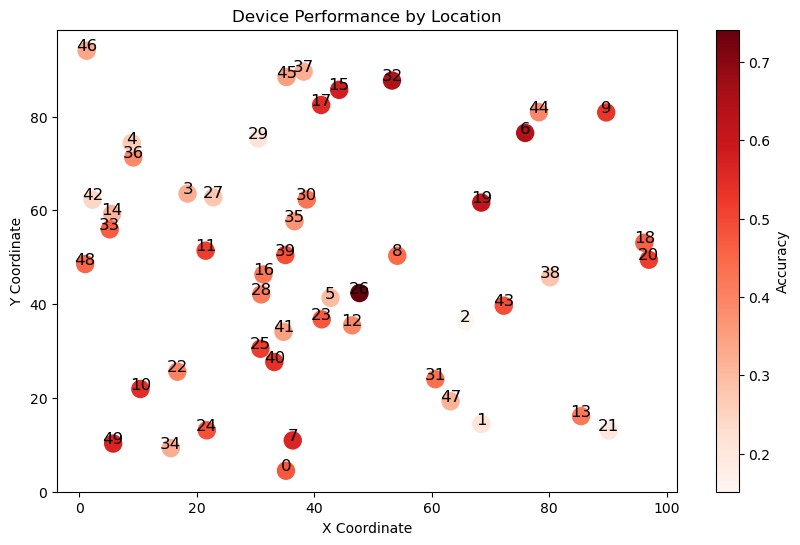

In [62]:
# Plots
# Plotting the scatter graph
plt.figure(figsize=(10, 6))

# Scatter plot
sc = plt.scatter(data['x'], data['y'], c=data['accuracy'], cmap='Reds', s=150)
# Adding device ID to the plot
for i in range(len(data)):
    plt.text(data['x'][i], data['y'][i], data['id'][i], fontsize=12, ha='center')

# Adding a color bar
cbar = plt.colorbar(sc)
cbar.set_label('Accuracy')

# Adding labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Device Performance by Location')

# Display the plot
plt.show()

Sample image saved as ../graphs/cifar10_samples.png


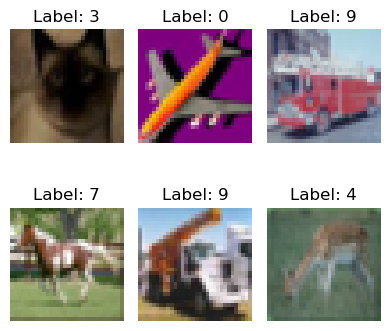

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import configuration

# Load the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
cifar10_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transform)

# Define a function to display a 2x2 grid of images
def display_and_save_samples(dataset, save_path=configuration.GRAPH_PATH + 'cifar10_samples.png'):
    # Create a figure to hold the 2x2 grid of images
    fig, axes = plt.subplots(2, 3, figsize=(4, 4))

    # Randomly select 4 images from the dataset
    for i in range(2):
        for j in range(3):
            index = np.random.randint(0, len(dataset))
            image, label = dataset[index]
            image = np.transpose(image.numpy(), (1, 2, 0))  # Convert from CHW to HWC format

            # Display the image on the grid
            axes[i, j].imshow(image)
            axes[i, j].set_title(f'Label: {label}')
            axes[i, j].axis('off')  # Hide the axes

    # Adjust layout to remove any unnecessary padding
    plt.tight_layout()

    # Save the figure
    plt.savefig(save_path, dpi=300)
    print(f'Sample image saved as {save_path}')

# Display and save 2x2 samples from the CIFAR-10 dataset
display_and_save_samples(cifar10_dataset)


c:\Users\Lance Bao\anaconda3\envs\HITL\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


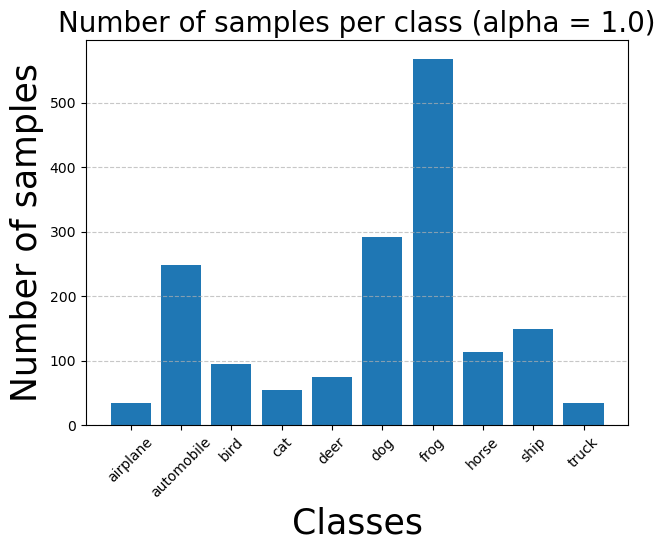

[13, 4, 11, 20, 1, 27, 14, 12, 2, 22, 7, 9, 5, 3, 26, 6, 16, 0, 10, 8, 23, 18, 17, 15, 24, 21, 29, 19, 28, 25]


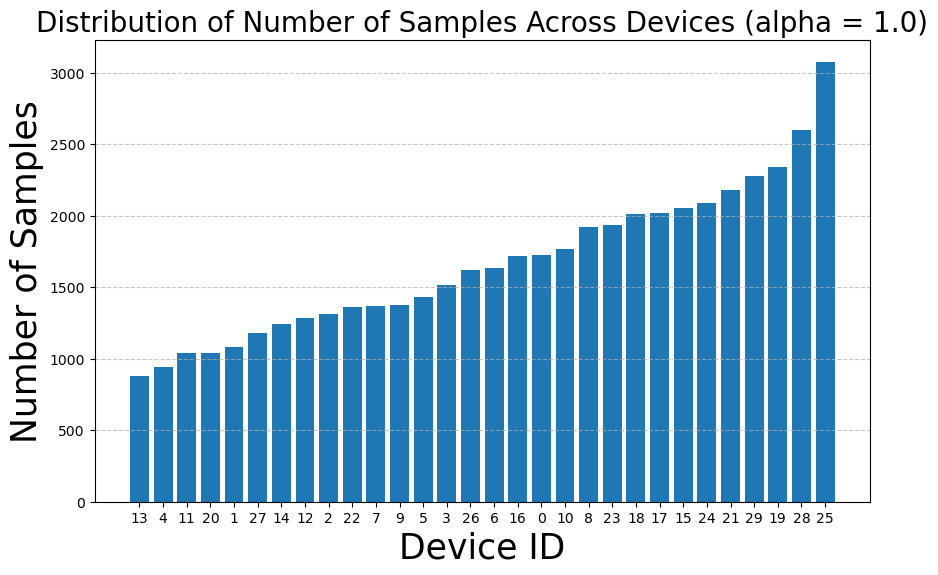

In [1]:
from collections import Counter
from dataset import get_nonIID_dataloader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import configuration

def plot_class_distribution(dataloader, class_names):
    # Initialize a counter for all classes
    class_counts = Counter()

    # Iterate through the dataloader and count the occurrences of each class label
    for _, labels in dataloader:
        class_counts.update(labels.numpy())

    # Extract the counts and sort them by class index
    counts = [class_counts[i] for i in range(len(class_names))]

    # Plotting the bar chart
    plt.figure(figsize=(7, 5))
    plt.bar(class_names, counts)
    plt.xlabel('Classes', fontsize=25)
    plt.ylabel('Number of samples', fontsize=25)
    plt.title('Number of samples per class (alpha = 1.0)', fontsize=20)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(configuration.GRAPH_PATH + 'non_iid_1_class.png', dpi=300, bbox_inches='tight')

    plt.show()

def plot_num_samples_distribution(dataloaders, num_devices):
    num_samples = [(i, len(dataloader.dataset)) for i, dataloader in enumerate(dataloaders)]

    # Sort the device IDs based on the number of samples
    num_samples_sorted = sorted(num_samples, key=lambda x: x[1])
    
    # Separate the sorted device IDs and sample counts
    sorted_device_ids = [item[0] for item in num_samples_sorted]
    sorted_num_samples = [item[1] for item in num_samples_sorted]
    print(sorted_device_ids)
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(range(num_devices), sorted_num_samples)
    plt.xticks(range(num_devices), sorted_device_ids)
    plt.xlabel('Device ID', fontsize=25)
    plt.ylabel('Number of Samples', fontsize=25)
    plt.title('Distribution of Number of Samples Across Devices (alpha = 1.0)', fontsize=20)
    plt.xticks(range(num_devices))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(configuration.GRAPH_PATH + 'non_iid_1_device.png', dpi=300, bbox_inches='tight')

    plt.show()

# Load the CIFAR-10 dataset
dataloader = get_nonIID_dataloader(configuration.DATA_PATH, train=True)

# Class names in CIFAR-10
transform = transforms.Compose([transforms.ToTensor()])
cifar10_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transform)
class_names = cifar10_dataset.classes

# Plot class distribution
plot_class_distribution(dataloader[0], class_names)
plot_num_samples_distribution(dataloader, configuration.NUMBER_OF_DEVICES)

In [4]:
from model import load_checkpoint, train, replace_fc_layer, save_checkpoint, reset_classifier_weights
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from dataset import CIFAR10, MNIST, get_dataloader, get_nonIID_dataloader
from configuration import DATA_PATH, DEVICE, BATCH_SIZE, NUM_OF_CLASSES, RANDOM_SEED, DATASET
from mcunet.mcunet.model_zoo import build_model
from eval import evaluate_model
import matplotlib.pyplot as plt


torch.manual_seed(RANDOM_SEED)
NUM_EPOCHS = 10
checkpoint_path = f"./checkpoints/baseline_checkpoint_2.pth"

# Load training data
# dataloader = get_CIFAR10_dataloader(DATA_PATH)
# # Load test data
if DATASET == 'CIFAR10':
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    # Load the CIFAR-10 dataset
    test_dataset = CIFAR10(root=DATA_PATH, train=False, download=False, transform=transform)
else:
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Load the MNIST dataset
    test_dataset = MNIST(root=DATA_PATH, train=False, download=False, transform=transform)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# dataloaders = get_nonIID_dataloader(DATA_PATH, train=True)
dataloader = get_dataloader(DATA_PATH, train=True)
# print(len(dataloaders))
# dataloader = dataloaders[0]
# Load the model
model, resolution, description = build_model(net_id="mcunet-in3", pretrained=True)
model = replace_fc_layer(model, NUM_OF_CLASSES)
model.first_conv.conv = nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
# model, _ = load_checkpoint(checkpoint_path)
# reset_classifier_weights(model)
model.to(DEVICE)


criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.005)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-3)
# Train the model

for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    losses = []
    accuracies = []
    f1s = []
    counter = 0
    
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    losses.append(epoch_loss)
    accuracy, f1 = evaluate_model(model, test_loader, DEVICE)
    accuracies.append(accuracy)
    f1s.append(f1)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}, F1 score: {f1:.4f}")
save_checkpoint(model, optimizer, 0, 0, "./checkpoints/baseline_MNIST.pth")
# Evaluate the model
# accuracy, f1 = evaluate_model(model, test_loader, DEVICE)
# print(f"Accuracy: {accuracy:.4f}, F1 score: {f1:.4f}")
print("accuracies: ", accuracies, "f1s: ", f1s, "losses: ", losses)


Epoch [1/10], Loss: 0.9941, Accuracy: 0.9284, F1 score: 0.9629
Epoch [2/10], Loss: 0.1991, Accuracy: 0.9566, F1 score: 0.9778
Epoch [3/10], Loss: 0.1170, Accuracy: 0.9655, F1 score: 0.9824
Epoch [4/10], Loss: 0.0877, Accuracy: 0.9704, F1 score: 0.9850
Epoch [5/10], Loss: 0.0704, Accuracy: 0.9734, F1 score: 0.9865
Epoch [6/10], Loss: 0.0581, Accuracy: 0.9768, F1 score: 0.9883
Epoch [7/10], Loss: 0.0503, Accuracy: 0.9786, F1 score: 0.9892
Epoch [8/10], Loss: 0.0442, Accuracy: 0.9786, F1 score: 0.9892
Epoch [9/10], Loss: 0.0406, Accuracy: 0.9807, F1 score: 0.9903
Epoch [10/10], Loss: 0.0366, Accuracy: 0.9804, F1 score: 0.9901
accuracies:  [0.9804] f1s:  [0.9901030094930318] losses:  [0.03664653904751928]


In [6]:
# save_checkpoint(model, optimizer, 50000, 0, "./checkpoints/final_baseline.pth")
acc = [0.5, 0.9284,0.9566,0.9655,0.9704,0.9734,0.9768,0.9786,0.9786,0.9807,0.9804]
f1 = [0, 0.9629,0.9778,0.9824,0.9850,0.9865,0.9883,0.9892,0.9892,0.9903,0.9901]
loss = [0,0.9941,0.1991,0.1170,0.0877,0.0704,0.0581,0.0503,0.0442,0.0406,0.0366]

Text(0, 0.5, 'Accuracy')

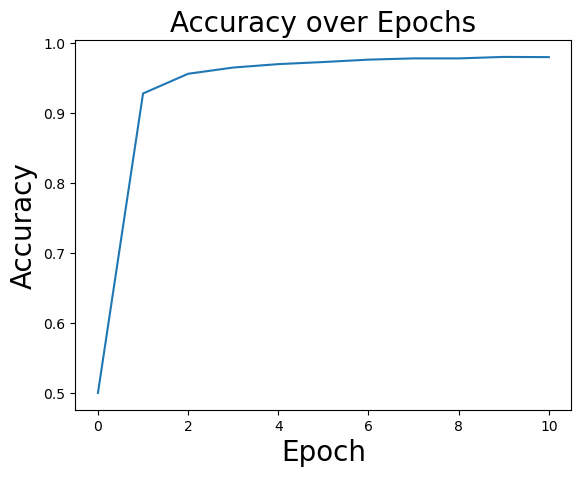

In [10]:
# plt.plot([0.5] + accuracies, label='CIFAR-10 Accuracy')
plt.plot(acc, label='MNIST Accuracy')
plt.xticks(range(0, 12, 2))
plt.title('Accuracy over Epochs', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
# plt.savefig('../graphs/baseline_accuracy.png', dpi = 300, bbox_inches='tight')

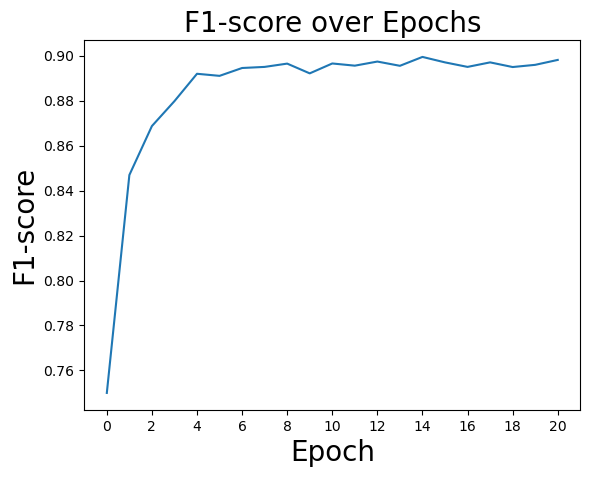

In [40]:
plt.plot([0.75] + f1s, label='Accuracy')
plt.xticks(range(0, 21, 2))
plt.title('F1-score over Epochs', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('F1-score', fontsize=20)
# plt.savefig('../graphs/baseline_f1.png', dpi = 300, bbox_inches='tight')

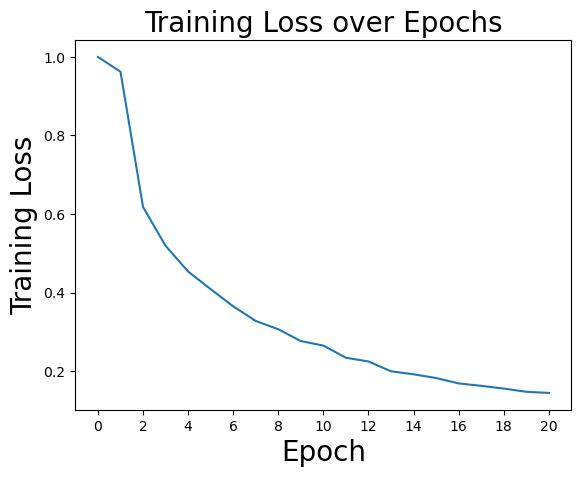

In [43]:
plt.plot([1.0] + losses, label='Loss')
plt.xticks(range(0, 21, 2))
plt.title('Training Loss over Epochs', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Training Loss', fontsize=20)
# plt.savefig('../graphs/baseline_loss_epoch.png', dpi = 300, bbox_inches='tight')

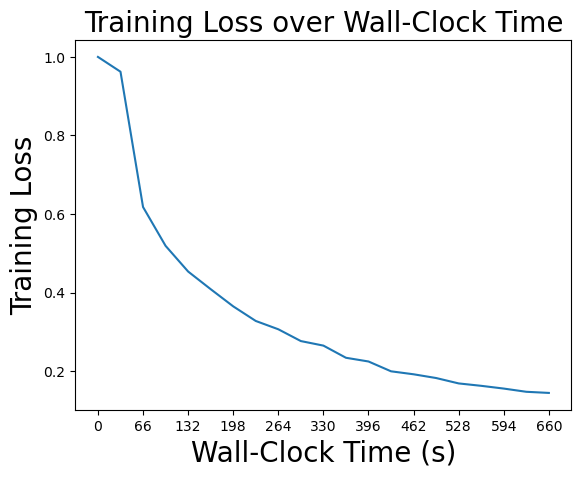

In [42]:
# loss over wall-clock time
plt.plot([1.0] + losses)
plt.title('Training Loss over Wall-Clock Time', fontsize=20)
plt.xlabel('Wall-Clock Time (s)', fontsize=20)
plt.ylabel('Training Loss', fontsize=20)
plt.xticks(range(0, 21, 2),[i*33 for i in range(0,21,2)])
# plt.savefig('../graphs/baseline_loss_time.png', dpi = 300, bbox_inches='tight')

0.0